# Modeling and Simulation in Python

Chapter 2

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

# set the random number generator
np.random.seed(7)

# If this cell runs successfully, it produces no output.

## Modeling a bikeshare system

We'll start with a `State` object that represents the number of bikes at each station.

When you display a `State` object, it lists the state variables and their values:

In [2]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


We can access the state variables using dot notation.

In [3]:
bikeshare.olin

10

In [5]:
bikeshare.wellsley

AttributeError: 'State' object has no attribute 'wellsley'

**Exercise:** What happens if you spell the name of a state variable wrong?  Edit the previous cell, change the spelling of `wellesley`, and run the cell again.

The error message uses the word "attribute", which is another name for what we are calling a state variable. 

**Exercise:** Add a third attribute called `babson` with initial value 0, and display the state of `bikeshare` again.

In [9]:
bikeshare = State(olin=10, wellesley=2,babson=0)
bikeshare

,values
olin,10
wellesley,2
babson,0


## Updating

We can use the update operators `+=` and `-=` to change state variables.

In [10]:
bikeshare.olin -= 1
bikeshare

,values
olin,9
wellesley,2
babson,0


If we display `bikeshare`, we should see the change.

In [11]:
bikeshare

,values
olin,9
wellesley,2
babson,0


Of course, if we subtract a bike from `olin`, we should add it to `wellesley`.

In [12]:
bikeshare.wellesley += 1
bikeshare

,values
olin,9
wellesley,3
babson,0


## Functions

We can take the code we've written so far and encapsulate it in a function.

In [13]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

When you define a function, it doesn't run the statements inside the function, yet.  When you call the function, it runs the statements inside.

In [14]:
bike_to_wellesley()
bikeshare

,values
olin,8
wellesley,4
babson,0



One common error is to omit the parentheses, which has the effect of looking up the function, but not calling it.

In [15]:
bike_to_wellesley

<function __main__.bike_to_wellesley()>

The output indicates that `bike_to_wellesley` is a function defined in a "namespace" called `__main__`, but you don't have to understand what that means.

**Exercise:** Define a function called `bike_to_olin` that moves a bike from Wellesley to Olin.  Call the new function and display `bikeshare`  to confirm that it works.

In [18]:
def bike_to_olin():
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [20]:
bike_to_olin()
bikeshare

,values
olin,9
wellesley,3
babson,0


## Parameters

Before we go on, let's start with a new state object.

In [21]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


Since we have two very similar functions, it would be better to define a new function, `move_bike`, that takes a parameter `n`, which indicates how many bikes are moving, and in which direction.

In [22]:
def move_bike(n):
    bikeshare.olin -= n
    bikeshare.wellesley += n

Now we can use `move_bike` to write simpler versions of the other functions.

In [23]:
def bike_to_wellesley():
    move_bike(1)
    
def bike_to_olin():
    move_bike(-1)

When we define these functions, we replace the old definitions with the new ones.

Now we can test them.

In [24]:
bike_to_wellesley()
bikeshare

,values
olin,9
wellesley,3


In [25]:
bike_to_olin()
bikeshare

,values
olin,10
wellesley,2


At this point, `move_bike` is complicated enough that we should add some documentation.  The text in triple-quotation marks is in English, not Python.  It doesn't do anything when the program runs, but it helps people understand what this function does and how to use it.

In [26]:
def move_bike(n):
    """Move bikes.
    
    n: number of bikes: positive moves from Olin to Wellesley;
                        negative moves from Wellesley to Olin
    """
    bikeshare.olin -= n
    bikeshare.wellesley += n

**Exercise:** The following function definitions start with print statements so they display messages when they run.  Call each of these functions (with appropriate arguments) and confirm that they do what you expect.

Adding print statements to functions is a useful debugging technique.  Keep it in mind!

In [27]:
def move_bike_debug(n):
    print('Running move_bike_debug with argument', n)
    bikeshare.olin -= n
    bikeshare.wellesley += n
    
def bike_to_wellesley_debug():
    print('Running bike_to_wellesley_debug')
    move_bike_debug(1)
    
def bike_to_olin_debug():
    print('Running bike_to_olin_debug')
    move_bike_debug(-1)

# Solution goes here

In [28]:
move_bike_debug(1)
bikeshare

Running move_bike_debug with argument 1


,values
olin,9
wellesley,3


In [33]:
bike_to_wellesley_debug()
bikeshare

Running bike_to_wellesley_debug
Running move_bike_debug with argument 1


,values
olin,8
wellesley,4


In [34]:
bike_to_olin_debug()
bikeshare

Running bike_to_olin_debug
Running move_bike_debug with argument -1


,values
olin,9
wellesley,3


## Conditionals

`modsim.py` provides `flip`, which takes a probability and returns either `True` or `False`, which are special values defined by Python.

The Python function `help` looks up a function and displays its documentation.

In [35]:
help(flip)

Help on function flip in module modsim:

flip(p=0.5)
    Flips a coin with the given probability.
    
    p: float 0-1
    
    returns: boolean (True or False)



In the following example, the probability is 0.7 or 70%.  If you run this cell several times, you should get `True` about 70% of the time and `False` about 30%.

In [36]:
flip(0.7)

True

In the following example, we use `flip` as part of an if statement.  If the result from `flip` is `True`, we print `heads`; otherwise we do nothing.

In [38]:
if flip(0.7):
    print('heads')

heads


With an else clause, we can print heads or tails depending on whether `flip` returns `True` or `False`.

In [39]:
if flip(0.7):
    print('heads')
else:
    print('tails')

tails


## Step

Now let's get back to the bikeshare state.  Again let's start with a new `State` object.

In [40]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


Suppose that in any given minute, there is a 50% chance that a student picks up a bike at Olin and rides to Wellesley.  We can simulate that like this.

In [41]:
if flip(0.5):
    bike_to_wellesley()
    print('Moving a bike to Wellesley')

bikeshare

,values
olin,10
wellesley,2


And maybe at the same time, there is also a 40% chance that a student at Wellesley rides to Olin.

In [42]:
if flip(0.4):
    bike_to_olin()
    print('Moving a bike to Olin')

bikeshare

,values
olin,10
wellesley,2


We can wrap that code in a function called `step` that simulates one time step.  In any given minute, a student might ride from Olin to Wellesley, from Wellesley to Olin, or both, or neither, depending on the results of `flip`.

In [43]:
def step():
    if flip(0.5):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(0.4):
        bike_to_olin()
        print('Moving a bike to Olin')

Since this function takes no parameters, we would call it like this:

In [44]:
step()
bikeshare

Moving a bike to Olin


,values
olin,11
wellesley,1


But it would be better to generalize this function so it takes the probabilities `p1` and `p2` as parameters:

In [45]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')

Now we can call it like this:

In [46]:
step(0.5, 0.4)
bikeshare

Moving a bike to Wellesley


,values
olin,10
wellesley,2


**Exercise:** At the beginning of `step`, add a print statement that displays the values of `p1` and `p2`.  Call it again with values `0.3`, and `0.2`, and confirm that the values of the parameters are what you expect. 

In [54]:
def step(p1, p2):
    print('p1 =',p1,', p2 =',p2)
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')

In [55]:
step(0.6,0.7)

p1 = 0.6 , p2 = 0.7
Moving a bike to Wellesley
Moving a bike to Olin


## For loop

Before we go on, I'll redefine `step` without the print statements.

In [56]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()
    
    if flip(p2):
        bike_to_olin()

And let's start again with a new `State` object:

In [59]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


We can use a `for` loop to move 4 bikes from Olin to Wellesley.

In [60]:
for i in range(4):
    bike_to_wellesley()
    
bikeshare

,values
olin,6
wellesley,6


Or we can simulate 4 random time steps.

In [61]:
for i in range(4):
    step(0.3, 0.2)
    
bikeshare

,values
olin,7
wellesley,5


If each step corresponds to a minute, we can simulate an entire hour like this.

In [62]:
for i in range(60):
    step(0.3, 0.2)

bikeshare

,values
olin,0
wellesley,12


After 60 minutes, you might see that the number of bike at Olin is negative.  We'll fix that problem soon.

But first, we want to plot the results.

## TimeSeries

`modsim.py` provides an object called a `TimeSeries` that can contain a sequence of values changing over time.

We can create a new, empty `TimeSeries` like this:

In [63]:
results = TimeSeries()

,values


And we can add a value to the `TimeSeries` like this:

In [64]:
results[0] = bikeshare.olin
results

,values
0,0


The `0` in brackets is an `index` that indicates that this value is associated with time step 0.

Now we'll use a for loop to save the results of the simulation.  I'll start one more time with a new `State` object.

In [68]:
bikeshare = State(olin=10, wellesley=2)

,values
olin,10
wellesley,2


Here's a for loop that runs 10 steps and stores the results.

In [69]:
for i in range(10):
    step(0.3, 0.2)
    results[i] = bikeshare.olin

Now we can display the results.

In [70]:
results

,values
0,10
1,9
2,9
3,10
4,11
5,11
6,10
7,10
8,11
9,10


A `TimeSeries` is a specialized version of a Pandas `Series`, so we can use any of the functions provided by `Series`, including several that compute summary statistics:

In [71]:
results.mean()

10.1

In [72]:
results.describe()

count    10.000000
mean     10.100000
std       0.737865
min       9.000000
25%      10.000000
50%      10.000000
75%      10.750000
max      11.000000
dtype: float64

You can read the documentation of `Series` [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

## Plotting

We can also plot the results like this.

Saving figure to file chap01-fig01.pdf


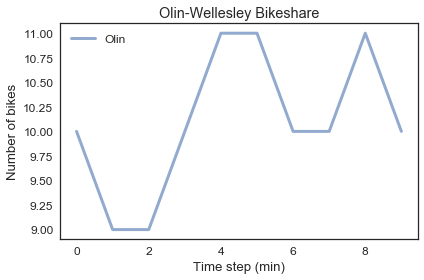

In [73]:
plot(results, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

savefig('chap01-fig01.pdf')

`decorate`, which is defined in the `modsim` library, adds a title and labels the axes.

In [74]:
help(decorate)

Help on function decorate in module modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



`savefig()` saves a figure in a file.

In [75]:
help(savefig)

Help on function savefig in module modsim:

savefig(filename, **options)
    Save the current figure.
    
    Keyword arguments are passed along to plt.savefig
    
    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.savefig.html
    
    filename: string



The suffix of the filename indicates the format you want.  This example saves the current figure in a PDF file named `chap01-fig01.pdf`.

**Exercise:** Wrap the code from this section in a function named `run_simulation` that takes three parameters, named `p1`, `p2`, and `num_steps`.

It should:

1. Create a `TimeSeries` object to hold the results.
2. Use a for loop to run `step` the number of times specified by `num_steps`, passing along the specified values of `p1` and `p2`.
3. After each step, it should save the number of bikes at Olin in the `TimeSeries`.
4. After the for loop, it should plot the results and
5. Decorate the axes.

To test your function:

1. Create a `State` object with the initial state of the system.
2. Call `run_simulation` with appropriate parameters.
3. Save the resulting figure.

In [86]:
def run_simulation(p1,p2,num_steps):
    bikes_at_olin=TimeSeries()
    for i in range(num_steps):
        step(p1,p2)
        bikes_at_olin[i]=bikeshare.olin
    plot(bikes_at_olin, label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

Saving figure to file chap01-fig02.pdf


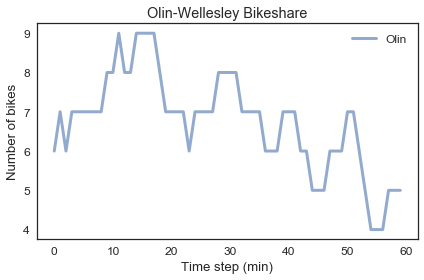

In [87]:
bikeshare = State(olin=6, wellesley=6)
run_simulation(0.25,0.25,60)
savefig('chap01-fig02.pdf')

**Exercise:** Modify your solution to the previous exercise so it creates two `TimeSeries` objects, keeps track of the number of bikes at Wellesley and at Olin, and plots both series at the end.

In [94]:
def run_simulation(p1,p2,num_steps):
    bikes_at_olin=TimeSeries()
    bikes_at_wellesley=TimeSeries()
    for i in range(num_steps):
        step(p1,p2)
        bikes_at_olin[i]=bikeshare.olin
        bikes_at_wellesley[i]=bikeshare.wellesley
    plot(bikes_at_olin, label='Olin')
    plot(bikes_at_wellesley, label='Wellesley')
    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')

Saving figure to file chap01-fig03.pdf


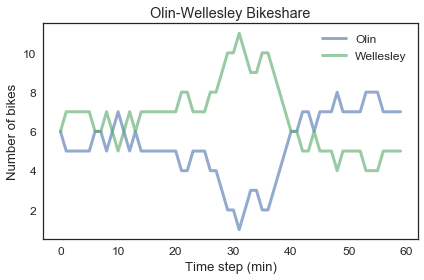

In [96]:
bikeshare = State(olin=6, wellesley=6)
run_simulation(0.25,0.25,60)
savefig('chap01-fig03.pdf')

In [97]:
help(plot)

Help on function plot in module modsim:

plot(*args, **options)
    Makes line plots.
    
    args can be:
      plot(y)
      plot(y, style_string)
      plot(x, y)
      plot(x, y, style_string)
    
    options are the same as for pyplot.plot



Congratulations on completing the first notebook!  When you did the exercises, you didn't have to write much new code; mostly, you just copied and modified the examples.  If you didn't understand everything you did completely I encourage you to take a break for now and come back to this notebook one more time before you start Chapter 2.  We are covering a lot of topics quickly; you might need to reread the book and review the code to solidify your knowledge. 

## Opening the hood

The functions in `modsim.py` are built on top of several widely-used Python libraries, especially NumPy, SciPy, and Pandas.  These libraries are powerful but can be hard to use.  The intent of `modsim.py` is to give you the power of these libraries while making it easy to get started.

In the future, you might want to use these libraries directly, rather than using `modsim.py`.  So at the end of each chapter we will open the hood and let you see how `modsim.py` works.

You don't need to know anything in these sections, so if you are already feeling overwhelmed, you might want to skip them.  But if you are curious, read on.

### Pandas

This chapter introduced two objects, `State` and `TimeSeries`.  Both are based on the `Series` object defined by Pandas, which is a library primarily used for data science.

You can read the documentation of the `Series` object [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html)

The primary differences between `TimeSeries` and `Series` are:

1. I made it easier to create a new, empty `Series` while avoiding a [confusing inconsistency](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html).

2. I provide a function so the `Series` looks good when displayed in Jupyter.

3. I provide a function called `set` that we'll use later.

`State` has all of those capabilities; in addition, it provides an easier way to initialize state variables, and it provides functions called `T` and `dt`, which will help us avoid a confusing error later.

### Pyplot

The `plot` function in `modsim.py` is based on the `plot` function in Pyplot, which is part of Matplotlib.  You can read the documentation of `plot` [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

`decorate` provides a convenient way to call the `pyplot` functions `title`, `xlabel`, and `ylabel`, and `legend`.  It also avoids an annoying warning message if you try to make a legend when you don't have any labelled lines.

In [98]:
help(decorate)

Help on function decorate in module modsim:

decorate(**options)
    Decorate the current axes.
    
    Call decorate with keyword arguments like
    
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    
    The keyword arguments can be any of the axis properties
    
    https://matplotlib.org/api/axes_api.html
    
    In addition, you can use `legend=False` to suppress the legend.
    
    And you can use `loc` to indicate the location of the legend
    (the default value is 'best')



### NumPy

The `flip` function in `modsim.py` uses NumPy's `random` function to generate a random number between 0 and 1.

You can get the source code for `flip` by running the following cell.

In [99]:
source_code(flip)

def flip(p=0.5):
    """Flips a coin with the given probability.

    p: float 0-1

    returns: boolean (True or False)
    """
    return np.random.random() < p



You can also get the source code for `source_code`.

In [100]:
source_code(source_code)

def source_code(obj):
    """Prints the source code for a given object.

    obj: function or method object
    """
    print(inspect.getsource(obj))

